In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [31]:
"""  
Q - First, we need to load the Iris dataset here. 
"""
iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['target']=iris.target_names[iris.target]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
""" 
Q - Get some information about the data.
"""
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

In [33]:
# --- Feature Engineering ---
X = data.drop('target', axis=1)
y = data['target']

In [34]:
""" 
Q- Scale the Features 
"""# we loead the Scale 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
"""
Q - Now let's perform a Train/Test split on the data.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
""" 
Q- time for model Selection and Training 
--> First one the Logistic Regression Model
"""
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred=logreg_model.predict(X_test)

In [19]:
""" 
Q- let's see how the model work with the data
"""
print("\nLogistic Regression:")
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))



Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [37]:
""" 
Q- next one is K-Nearest Neighbors 

"""
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_pred=knn_model.predict(X_test)

In [38]:
""" 
Q- let's how the model work with this data Set 
"""
print("\nk-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))


k-Nearest Neighbors:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [39]:
""" 
Q- the final one is Decision Tree Classifier

"""
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred=dt_model.predict(X_test)


In [40]:
print("\nDecision Tree:")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))


Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


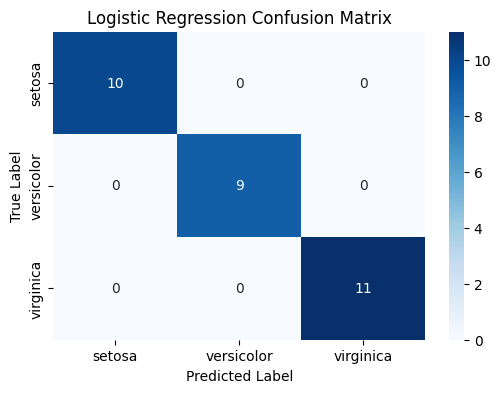

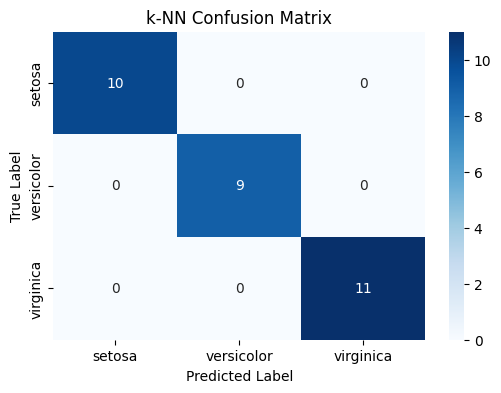

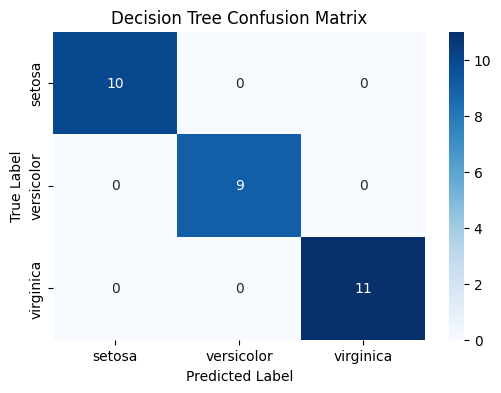

In [41]:
# Visualize Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, logreg_pred, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, knn_pred, 'k-NN Confusion Matrix')
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')

In [42]:
""" 
Q-the imporant part is here " The Pipeline" 
"""
# --- Pipeline Simulation ---
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline_lr.fit(X_train, y_train)
pipeline_pred = pipeline_lr.predict(X_test)


Pipeline Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



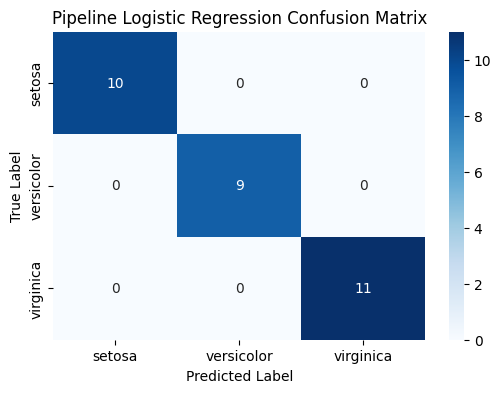


 Proof of concept Done 


In [43]:
print("\nPipeline Logistic Regression:")
print(classification_report(y_test, pipeline_pred))
plot_confusion_matrix(y_test, pipeline_pred, 'Pipeline Logistic Regression Confusion Matrix')

# --- Conclusion ----
print("\n Proof of concept Done ")